In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect("/content/drive/MyDrive/Geospatial Analysis Project(Zomato)/zomato_rawdata.sqlite")

In [ ]:
pd.read_sql_query("SELECT * FROM Users" , con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [ ]:
df.shape

(51717, 18)

In [ ]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
df.isnull().sum()

,0
index,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21


In [ ]:
df.isnull().sum()/len(df)*100

,0
index,0.000000
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606


In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [ ]:
df['rate']

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51712,3.6
51713,NaN
51714,NaN
51715,4.3


In [ ]:
x = pd.crosstab(df['rate'] , df['online_order'])

In [ ]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

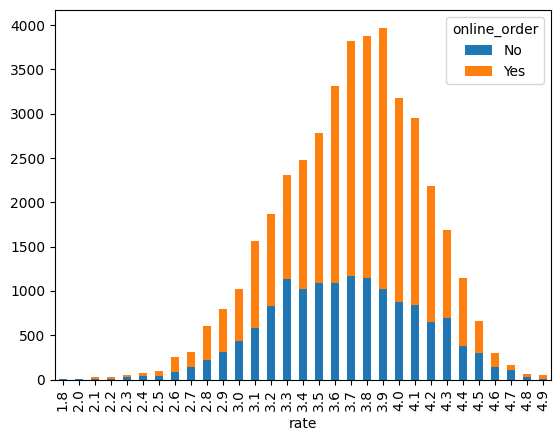

In [ ]:
x.plot(kind='bar' , stacked=True)

In [ ]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [ ]:
x.sum(axis=1).astype(float)

,0
rate,
1.8,5.0
2.0,11.0
2.1,24.0
2.2,26.0
2.3,51.0
2.4,70.0
2.5,101.0
2.6,260.0
2.7,307.0


In [ ]:
normalize_df = x.div(x.sum(axis=1).astype(float) , axis=0)

<Axes: xlabel='rate'>

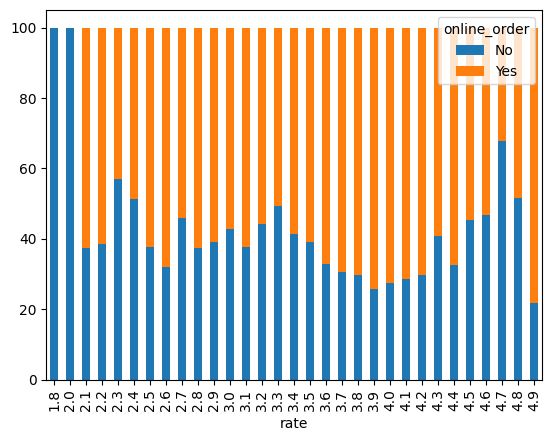

In [ ]:
(normalize_df*100).plot(kind='bar' , stacked=True)

In [ ]:
df['rest_type'].isnull().sum()

227

In [ ]:
data = df.dropna(subset=['rest_type'])

In [ ]:
data['rest_type'].isnull().sum()

0

In [ ]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [ ]:
quick_bites_df.shape

(20639, 18)

In [ ]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [ ]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\mcr\AppData\Local\Temp\ipykernel_1740\4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [ ]:
from nltk.corpus import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [ ]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [ ]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [ ]:
sample = data[0:10000]

In [ ]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [ ]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')

In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [ ]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [ ]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [ ]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [ ]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [ ]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [ ]:
total_reviews_2D = list(reviews_tokens_clean)

In [ ]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [ ]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [ ]:
from nltk import FreqDist

In [ ]:
fd = FreqDist()

In [ ]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [ ]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

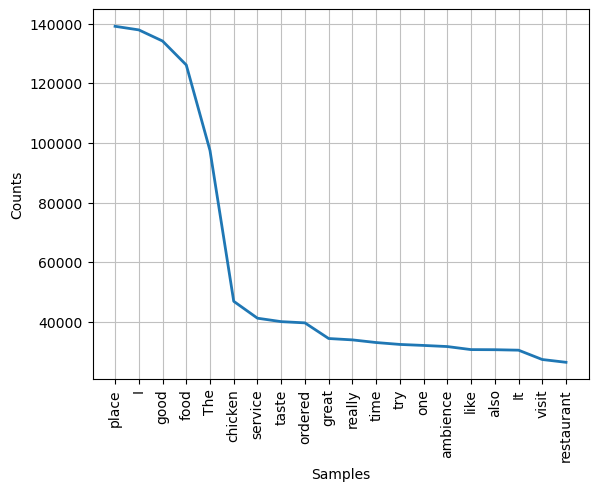

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
fd.plot(20)

In [ ]:
from nltk import FreqDist , bigrams , trigrams

In [ ]:
bi_grams = bigrams(total_reviews_1D)

In [ ]:
bi_grams

<generator object bigrams at 0x00000217492A35F0>

In [ ]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [ ]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

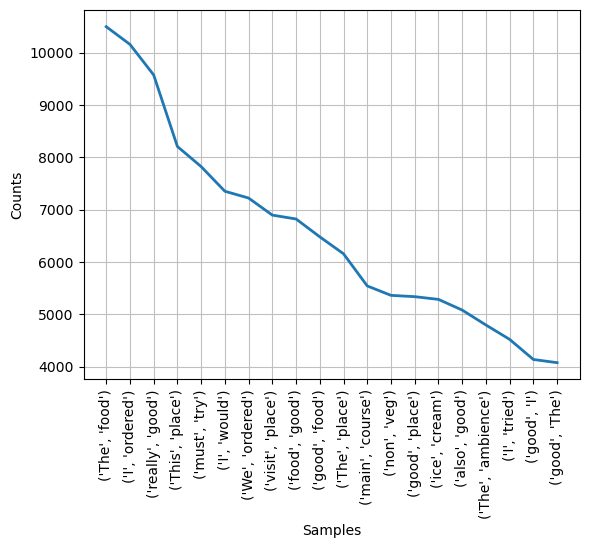

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
fd_bigrams.plot(20)

In [ ]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

In [ ]:
tri_grams = trigrams(total_reviews_1D)

In [ ]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [ ]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

In [ ]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
!pip install geocoder
!pip install geopy

In [ ]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [ ]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [ ]:
len(df['location'].unique())

94

In [ ]:
df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [ ]:
df['location']

0           Banashankari , Bangalore  , Karnataka , India 
1           Banashankari , Bangalore  , Karnataka , India 
2           Banashankari , Bangalore  , Karnataka , India 
3           Banashankari , Bangalore  , Karnataka , India 
4           Basavanagudi , Bangalore  , Karnataka , India 
                               ...                        
51712         Whitefield , Bangalore  , Karnataka , India 
51713         Whitefield , Bangalore  , Karnataka , India 
51714         Whitefield , Bangalore  , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51717, dtype: object

In [ ]:
df['location'].unique()

array(['Banashankari , Bangalore  , Karnataka , India ',
       'Basavanagudi , Bangalore  , Karnataka , India ',
       'Mysore Road , Bangalore  , Karnataka , India ',
       'Jayanagar , Bangalore  , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore  , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore  , Karnataka , India ',
       'Vijay Nagar , Bangalore  , Karnataka , India ',
       'Uttarahalli , Bangalore  , Karnataka , India ',
       'JP Nagar , Bangalore  , Karnataka , India ',
       'South Bangalore , Bangalore  , Karnataka , India ',
       'City Market , Bangalore  , Karnataka , India ',
       'Nagarbhavi , Bangalore  , Karnataka , India ',
       'Bannerghatta Road , Bangalore  , Karnataka , India ',
       'BTM , Bangalore  , Karnataka , India ',
       'Kanakapura Road , Bangalore  , Karnataka , India ',
       'Bommanahalli , Bangalore  , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore  , Karnataka , India ',
       'Electronic Ci

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['location'].isnull().sum()

21

In [ ]:
df_copy = df_copy.dropna(subset=['location'])

In [ ]:
df_copy['location'].isnull().sum()

0

In [ ]:
locations = pd.DataFrame(df_copy['location'].unique())

In [ ]:
locations.columns = ['name']

In [ ]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , ..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [ ]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)


In [ ]:
locations['latitude'] = lat
locations['longitude'] = lon

    We have found out latitude and longitude of each location listed in the dataset using geopy
    This is used to plot maps.

In [ ]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [ ]:
locations.isnull().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [ ]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
45,"St. Marks Road , Bangalore , Karnataka , India",NaN,NaN
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
locations['latitude'][45] = 12.9764122
locations['longitude'][45] = 77.6017437

In [ ]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [ ]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [ ]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [ ]:
df['cuisines'].isnull().sum()

45

In [ ]:
df = df.dropna(subset=['cuisines'])

In [ ]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [ ]:
north_india.shape

(21085, 18)

In [ ]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})

In [ ]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , I...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [ ]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [ ]:
heatmap_df = north_india_rest_count.merge(locations , on='name' , how='left')

In [ ]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.880358,77.579658
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , I...",2,13.010129,77.554801
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [ ]:
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
basemap

In [ ]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

In [ ]:
basemap

In [ ]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]

    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap



In [ ]:
get_heatmap('South Indian')

                                          name  count   latitude  longitude
0        BTM , Bangalore  , Karnataka , India     815  12.911276  77.604565
1   JP Nagar , Bangalore  , Karnataka , India     437  12.880358  77.579658
2        HSR , Bangalore  , Karnataka , India     436  12.911623  77.638862
3  Jayanagar , Bangalore  , Karnataka , India     416  12.929273  77.582423


In [ ]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)